In [326]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [327]:
df = sns.load_dataset('iris')

In [328]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [329]:
encoder=LabelEncoder()
df["species"]=encoder.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [330]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [331]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [332]:
df = df[['sepal_width','petal_width','species']]
df

,sepal_width,petal_width,species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


In [333]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [334]:
X

,sepal_width,petal_width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2
...,...,...
145,3.0,2.3
146,2.5,1.9
147,3.0,2.0
148,3.4,2.3


In [335]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [336]:
model = LogisticRegression(multi_class='multinomial')

In [337]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [338]:
y_pred = model.predict(X_test)

In [339]:
y_pred

array([0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [340]:
print(accuracy_score(y_test,y_pred))

0.8666666666666667


In [341]:
pd.DataFrame(confusion_matrix(y_test,y_pred))


,0,1,2
0,13,1,0
1,0,6,2
2,0,1,7


In [342]:
query = np.array([[3.4, 2.7]])
model.predict_proba(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.86039277e-05, 1.18142433e-02, 9.88107153e-01]])

In [343]:
model.predict(query)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


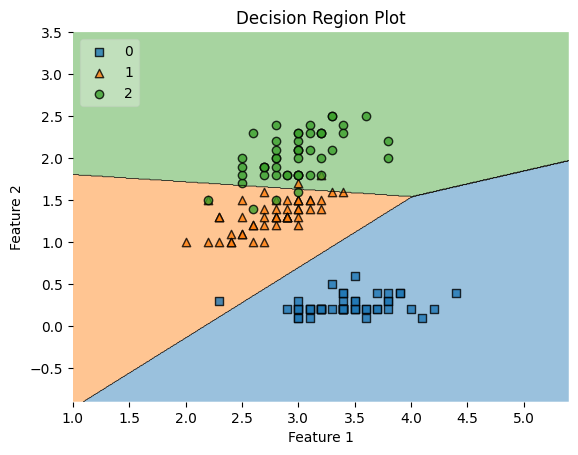

In [344]:
from mlxtend.plotting import plot_decision_regions

# Assuming you have trained a model called 'model' and have your features (X) and labels (y)
plot_decision_regions(X.values, y.values, model, legend=2)

# Adding axes annotations
import matplotlib.pyplot as plt
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot')
plt.show()
